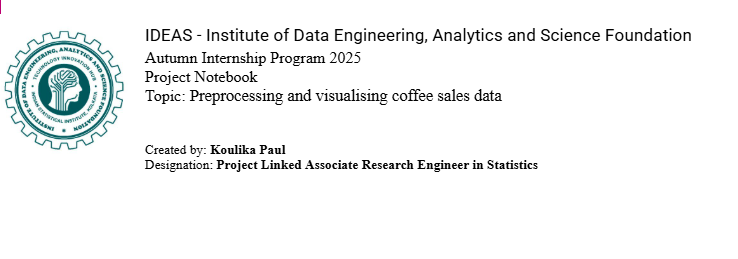

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
coffee_data=pd.read_csv("/content/drive/MyDrive/Coffe_sales.csv")
coffee_data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


**Q1. Find the number of columns, duplicate columns, and missing values**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For uploading files
from google.colab import files
uploaded = files.upload()

# Load dataset (after upload)
df = pd.read_csv("Coffe_sales.csv")

# Number of columns
print("Total number of columns:", df.shape[1])

# Duplicate columns
dup_cols = df.T.duplicated().sum()
print("Number of duplicate columns:", dup_cols)
if dup_cols > 0:
    print("Duplicate column names:", df.columns[df.T.duplicated()].tolist())

# Missing values
print("Total missing values:", df.isnull().sum().sum())
print("Missing values per column:\n", df.isnull().sum()[df.isnull().sum() > 0])

Saving Coffe_sales.csv to Coffe_sales (21).csv
Total number of columns: 11
Number of duplicate columns: 0
Total missing values: 0
Missing values per column:
 Series([], dtype: int64)


***Basic statistics of the data***

In [ ]:
coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [ ]:
coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [ ]:
coffee_data['Date']= pd.to_datetime(coffee_data['Date']) ## converting the object datatype to datetime
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year).astype('int')

***Average money for each year***

In [ ]:
grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)
grouped_data

/tmp/ipython-input-3058338727.py:1: FutureWarning: The provided callable <function mean at 0x7cfe5a3e9c60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)


,money
Year,
2024,31.737634
2025,31.390011


**Q2. Find the datatype of grouped_data**

In [13]:
import pandas as pd
from google.colab import files

# Upload dataset
uploaded = files.upload()
df = pd.read_csv("Coffe_sales.csv")

# Group data by coffee name (example grouping for analysis)
grouped_data = df.groupby("coffee_name")["money"].sum()

# Find and display datatype of grouped_data
print("Datatype of grouped_data:", type(grouped_data))

Saving Coffe_sales.csv to Coffe_sales (6).csv
Datatype of grouped_data: <class 'pandas.core.series.Series'>


**Q3. Find the maximum money for each month**

In [14]:
import pandas as pd
from google.colab import files

# Upload dataset
uploaded = files.upload()
df = pd.read_csv("Coffe_sales.csv")

# Find maximum money for each month
max_money_by_month = df.groupby("Month_name")["money"].max().reset_index()

# Sort by month for better readability
max_money_by_month = max_money_by_month.sort_values(by="money", ascending=False)

# Display results
print("Maximum Money for Each Month:")
for _, row in max_money_by_month.iterrows():
    print(f"- {row['Month_name']}: {row['money']:.2f}")

Saving Coffe_sales.csv to Coffe_sales (7).csv
Maximum Money for Each Month:
- Apr: 38.70
- Mar: 38.70
- Jul: 37.72
- Jun: 37.72
- May: 37.72
- Jan: 35.76
- Dec: 35.76
- Feb: 35.76
- Oct: 35.76
- Nov: 35.76
- Sep: 35.76
- Aug: 32.82


***Distribution of money over months***

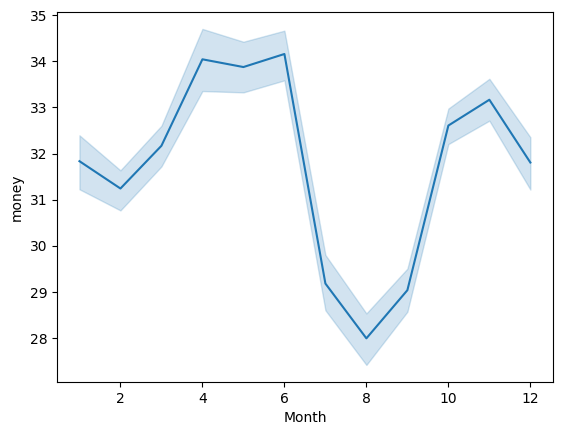

In [ ]:
sns.lineplot(x=coffee_data['Month'],y='money',data=coffee_data)
plt.show()

***The density of money over years***

<Axes: xlabel='Year', ylabel='money'>

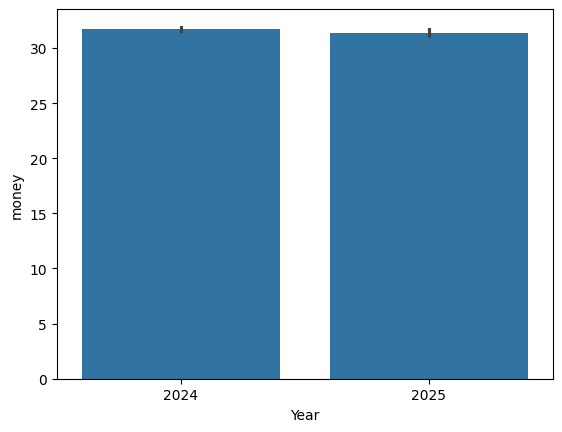

In [ ]:
sns.barplot(data= coffee_data,x='Year',y= coffee_data['money'])


**Q4. Find the distribution of money over coffee names**


Saving Coffe_sales.csv to Coffe_sales (8).csv


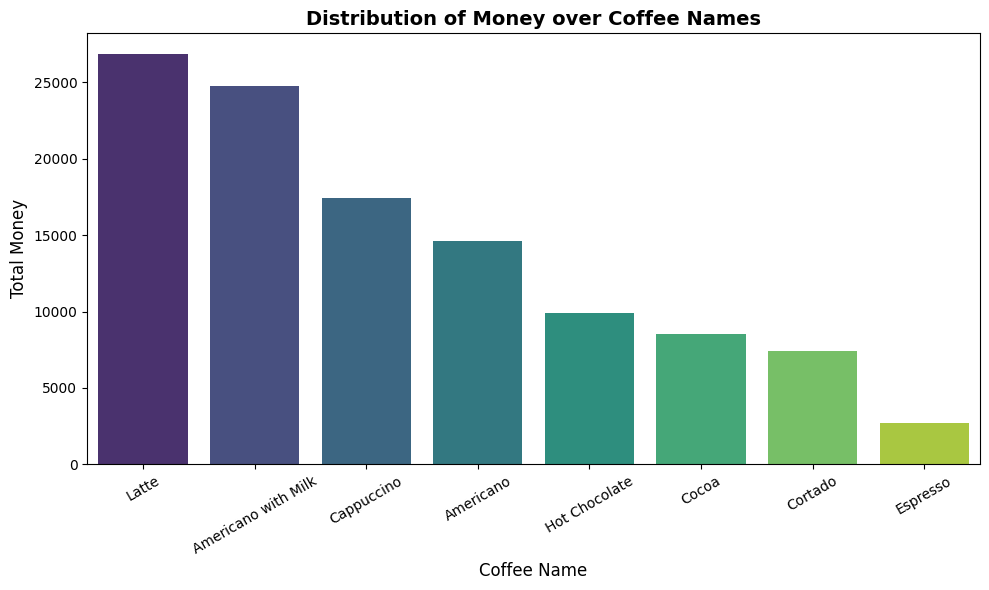

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload dataset
uploaded = files.upload()
df = pd.read_csv("Coffe_sales.csv")

# Group sales by coffee name
money_distribution = df.groupby("coffee_name")["money"].sum().reset_index()

# Sort for better visualization
money_distribution = money_distribution.sort_values(by="money", ascending=False)

# Plot distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=money_distribution, x="coffee_name", y="money", hue="coffee_name", palette="viridis", legend=False)

plt.title("Distribution of Money over Coffee Names", fontsize=14, weight="bold")
plt.xlabel("Coffee Name", fontsize=12)
plt.ylabel("Total Money", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

***Times of the Day the dataset holds***

In [ ]:
coffee_data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Afternoon,1205
Morning,1181
Night,1161


**Q5. How many types of coffees are present in the dataset?**

Saving Coffe_sales.csv to Coffe_sales (9).csv
Total number of coffee types: 8
Coffee Types:
- Latte
- Hot Chocolate
- Americano
- Americano with Milk
- Cocoa
- Cortado
- Espresso
- Cappuccino


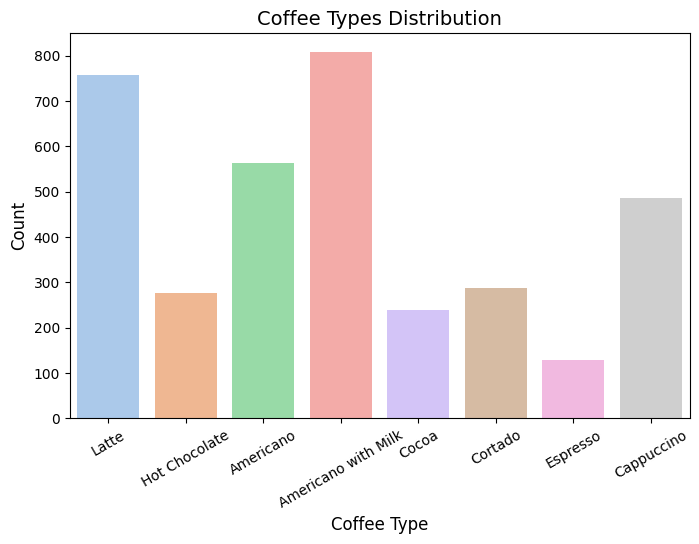

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
df = pd.read_csv("Coffe_sales.csv")

num_coffee_types = df['coffee_name'].nunique()
coffee_types = df['coffee_name'].unique()

print(f"Total number of coffee types: {num_coffee_types}")
print("Coffee Types:")
for coffee in coffee_types:
    print("-", coffee)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='coffee_name', hue='coffee_name', palette="pastel", legend=False)

plt.title("Coffee Types Distribution", fontsize=14)
plt.xlabel("Coffee Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=30)
plt.show()

***Max money from coffee_name***

In [ ]:
coffee_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
56,56.0
Americano,28.9
Americano with Milk,33.8
Cappuccino,38.7
Cocoa,38.7
Cortado,28.9
Espresso,24.0
Hot Chocolate,38.7
Latte,38.7


**Q6. Find the average money made at what time of the day.**

Saving Coffe_sales.csv to Coffe_sales (10).csv
Average Money Made by Time of Day:
- Afternoon: 31.64
- Morning: 30.42
- Night: 32.89


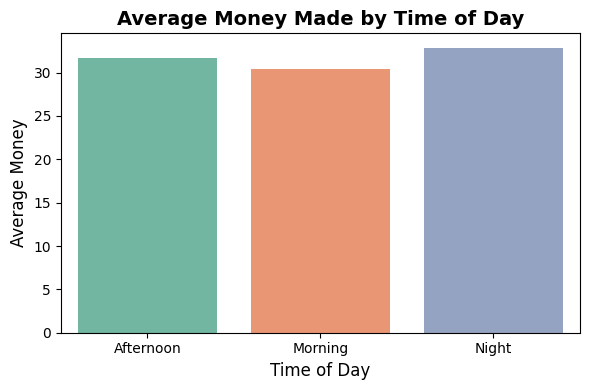

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the CSV file
uploaded = files.upload()
df = pd.read_csv("Coffe_sales.csv")

# Calculate average money made at different times of the day
avg_money_by_time = df.groupby("Time_of_Day")["money"].mean().reset_index()

# Display results
print("Average Money Made by Time of Day:")
for _, row in avg_money_by_time.iterrows():
    print(f"- {row['Time_of_Day']}: {row['money']:.2f}")

# Plot results
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_money_by_time, x="Time_of_Day", y="money", hue="Time_of_Day", palette="Set2", legend=False)

plt.title("Average Money Made by Time of Day", fontsize=14, fontweight="bold")
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Average Money", fontsize=12)
plt.tight_layout()
plt.show()

***Generate 100 synthetic data rows***

In [ ]:

date_range= date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({"date": date_range, "value": values})
df

,date,value
0,2023-01-01,1.166936
1,2023-01-02,1.573639
2,2023-01-03,1.246487
3,2023-01-04,2.082552
4,2023-01-05,1.597629
...,...,...
95,2023-04-06,-9.013257
96,2023-04-07,-8.219102
97,2023-04-08,-8.810398
98,2023-04-09,-8.505690


**Q7. Insert synthetic data into the given data set and analyse as above.**

Saving Coffe_sales.csv to Coffe_sales (11).csv

Average Money Made by Time of Day (After Adding Synthetic Data):
Afternoon: 32.84
Morning: 31.93
Night: 34.04


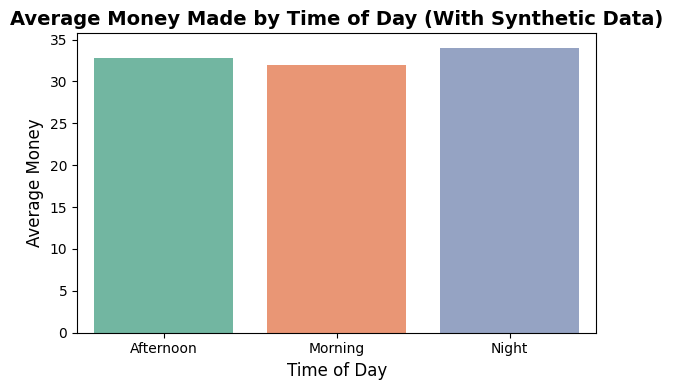

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# Upload the CSV file
uploaded = files.upload()
df = pd.read_csv("Coffe_sales.csv")

# Create synthetic data (random but realistic)
synthetic_data = {
    "hour_of_day": np.random.choice(range(6, 23), size=50),  # Hours between 6 AM - 10 PM
    "cash_type": np.random.choice(["cash", "card", "size50"], size=50),
    "money": np.random.randint(20, 250, size=50),  # Random sales amount
    "coffee_name": np.random.choice(df["coffee_name"].unique(), size=50),
    "Time_of_Day": np.random.choice(["Morning", "Afternoon", "Night"], size=50),
    "Day": np.random.choice(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], size=50),
    "Month_name": np.random.choice(["Jan", "Feb", "Mar", "Apr", "May"], size=50),
    "Weekdaysort": np.random.randint(1, 8, size=50),
    "Monthsort": np.random.randint(1, 12, size=50),
    "Date": pd.date_range(start="2024-01-01", periods=50, freq="D"),
    "Time": pd.date_range(start="2024-01-01", periods=50, freq="h").time
}

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Combine original + synthetic data
combined_df = pd.concat([df, synthetic_df], ignore_index=True)

# Recalculate average money made at different times of the day
avg_money_by_time = (
    combined_df.groupby("Time_of_Day")["money"].mean().reset_index()
)

# Display results
print("\nAverage Money Made by Time of Day (After Adding Synthetic Data):")
for _, row in avg_money_by_time.iterrows():
    print(f"{row['Time_of_Day']}: {row['money']:.2f}")

# Plot results
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_money_by_time, x="Time_of_Day", y="money", hue="Time_of_Day", palette="Set2")

plt.title("Average Money Made by Time of Day (With Synthetic Data)", fontsize=14, fontweight="bold")
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Average Money", fontsize=12)
plt.tight_layout()
plt.show()
